# Clasificacion KNN

In [13]:
import pandas as pd

data_path = './data/'


train_data = pd.read_csv(f'{data_path}train_data.csv')

# Selección de características con mrMr
df_reduce_mrmr = pd.read_csv(f'{data_path}X_train_reduce_mrmr.csv')
df_reduce_mrmr_instances = pd.read_csv(f'{data_path}df_reduce_mrmr_instances.csv')
df_reduce_mrmr_instances_hard = pd.read_csv(f'{data_path}df_reduce_mrmr_instances_hard.csv')
df_reduce_mrmr_instances_GLVQ = pd.read_csv(f'{data_path}df_reduce_mrmr_instances_GLVQ.csv')

# Selección de características con RFC
df_X_train_reduce_RFC = pd.read_csv(f'{data_path}df_X_train_reduce_RFC.csv')
df_reduce_RFC_instances = pd.read_csv(f'{data_path}df_reduce_RFC_instances.csv')
df_reduce_RFC_instances_hard = pd.read_csv(f'{data_path}df_reduce_RFC_instances_hard.csv')
df_reduce_RFC_instances_GLVQ = pd.read_csv(f'{data_path}df_reduce_RFC_instances_GLVQ.csv')

# Mostrar información sobre los DataFrames cargados
print("Datos cargados exitosamente:")
print(f"train_data: {train_data.shape}")
print(f"df_reduce_mrmr: {df_reduce_mrmr.shape}")
print(f"df_reduce_mrmr_instances: {df_reduce_mrmr_instances.shape}")
print(f"df_reduce_mrmr_instances_GLVQ: {df_reduce_mrmr_instances_GLVQ.shape}")
print(f"df_X_train_reduce_RFC: {df_X_train_reduce_RFC.shape}")
print(f"df_reduce_RFC_instances: {df_reduce_RFC_instances.shape}")
print(f"df_reduce_RFC_instances_GLVQ: {df_reduce_RFC_instances_GLVQ.shape}")


Datos cargados exitosamente:
train_data: (256326, 31)
df_reduce_mrmr: (256326, 11)
df_reduce_mrmr_instances: (886, 11)
df_reduce_mrmr_instances_GLVQ: (2, 11)
df_X_train_reduce_RFC: (256326, 11)
df_reduce_RFC_instances: (886, 11)
df_reduce_RFC_instances_GLVQ: (2, 11)


### KNN con mrMr clusterCentroids_soft

Dimensiones de los conjuntos:
Conjunto de entrenamiento: (708, 10), (708,)
Conjunto de prueba: (178, 10), (178,)


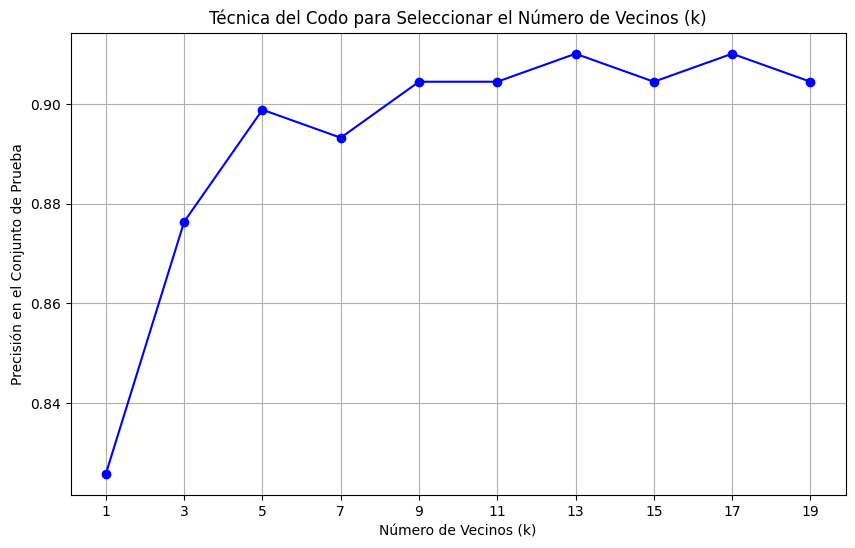

El número óptimo de vecinos (k) es: 13 con una precisión de 0.91


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X = df_reduce_mrmr_instances.drop(columns=['Class'])
y = df_reduce_mrmr_instances['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Dimensiones de los conjuntos:")
print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}, {y_test.shape}")


k_values = [x for x in range(1, 21) if x % 2 ==1]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

# Graficar la técnica del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Técnica del Codo para Seleccionar el Número de Vecinos (k)')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión en el Conjunto de Prueba')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Mostrar el mejor valor de k
best_k = k_values[accuracies.index(max(accuracies))]
print(f"El número óptimo de vecinos (k) es: {best_k} con una precisión de {max(accuracies):.2f}")


### KNN con mrMr clusterCentroids_hard

Dimensiones de los conjuntos:
Conjunto de entrenamiento: (708, 10), (708,)
Conjunto de prueba: (178, 10), (178,)


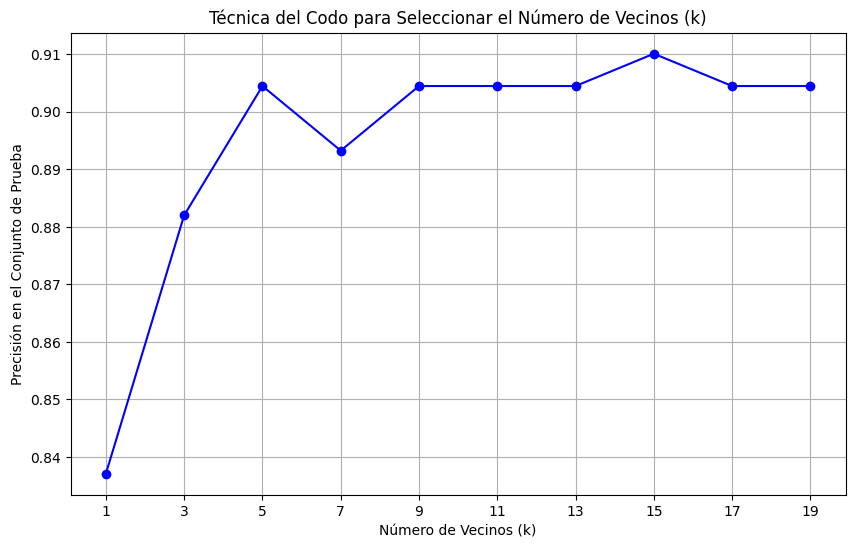

El número óptimo de vecinos (k) es: 15 con una precisión de 0.91


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X = df_reduce_mrmr_instances_hard.drop(columns=['Class'])
y = df_reduce_mrmr_instances_hard['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Dimensiones de los conjuntos:")
print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}, {y_test.shape}")


k_values = [x for x in range(1, 21) if x % 2 ==1]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

# Graficar la técnica del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Técnica del Codo para Seleccionar el Número de Vecinos (k)')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión en el Conjunto de Prueba')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Mostrar el mejor valor de k
best_k = k_values[accuracies.index(max(accuracies))]
print(f"El número óptimo de vecinos (k) es: {best_k} con una precisión de {max(accuracies):.2f}")


### KNN con mrMr y GLVQ

In [8]:
X = df_reduce_mrmr_instances_GLVQ.drop(columns=['Class'])
y = df_reduce_mrmr_instances_GLVQ['Class']

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
accuracy = knn.score(X_test, y_test)

print(f"Usando GLVQ tenemos una precisión de {accuracy:.2f}")


Usando GLVQ tenemos una precisión de 0.73


### KNN con RFC clusterCentroids_soft

Dimensiones de los conjuntos:
Conjunto de entrenamiento: (708, 10), (708,)
Conjunto de prueba: (178, 10), (178,)


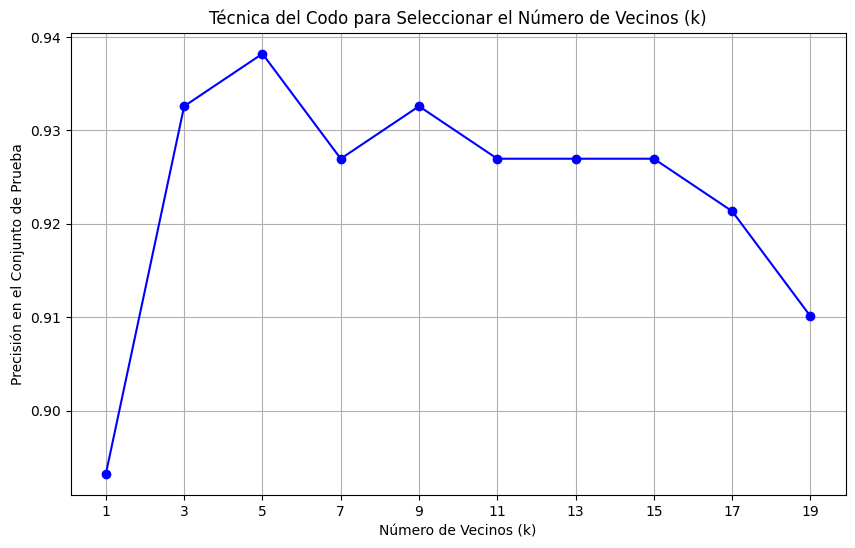

El número óptimo de vecinos (k) es: 5 con una precisión de 0.94


In [9]:
X = df_reduce_RFC_instances.drop(columns=['Class'])
y = df_reduce_RFC_instances['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de los conjuntos:")
print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}, {y_test.shape}")

k_values = [x for x in range(1, 21) if x % 2 ==1]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

# Graficar la técnica del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Técnica del Codo para Seleccionar el Número de Vecinos (k)')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión en el Conjunto de Prueba')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Mostrar el mejor valor de k
best_k = k_values[accuracies.index(max(accuracies))]
print(f"El número óptimo de vecinos (k) es: {best_k} con una precisión de {max(accuracies):.2f}")

### KNN con RFC clusterCentroids_hard

Dimensiones de los conjuntos:
Conjunto de entrenamiento: (708, 10), (708,)
Conjunto de prueba: (178, 10), (178,)


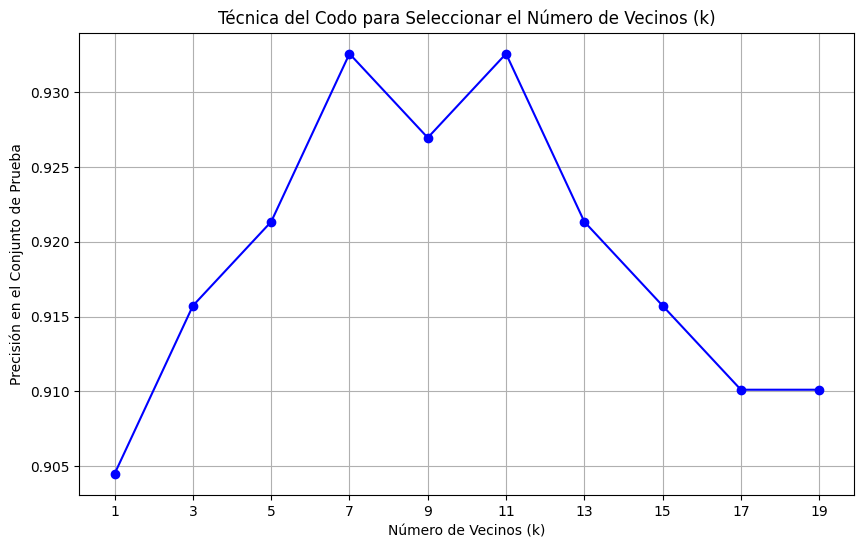

El número óptimo de vecinos (k) es: 7 con una precisión de 0.93


In [14]:
X = df_reduce_RFC_instances_hard.drop(columns=['Class'])
y = df_reduce_RFC_instances_hard['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de los conjuntos:")
print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}, {y_test.shape}")

k_values = [x for x in range(1, 21) if x % 2 ==1]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

# Graficar la técnica del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Técnica del Codo para Seleccionar el Número de Vecinos (k)')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión en el Conjunto de Prueba')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Mostrar el mejor valor de k
best_k = k_values[accuracies.index(max(accuracies))]
print(f"El número óptimo de vecinos (k) es: {best_k} con una precisión de {max(accuracies):.2f}")

### KNN con RFC y GLVQ


In [10]:
X = df_reduce_RFC_instances_GLVQ.drop(columns=['Class'])
y = df_reduce_RFC_instances_GLVQ['Class']

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
accuracy = knn.score(X_test, y_test)

print(f"Usando GLVQ tenemos una precisión de {accuracy:.2f}")

Usando GLVQ tenemos una precisión de 0.88
